In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [80]:
# 画出分类决策域
def plot_decision_regions(x, y, classifier, title, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors=colors[:len(np.unique(y))])
    # plot decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot samples
    x_test, y_test = x[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1], 
                    alpha=0.8, 
                    c=cmap(idx),marker=markers[idx],
                    label=cl)
    # highlight test samples
    if test_idx:# not test_idx == None
        plt.scatter(x_test[:,0], 
                    x_test[:,1], 
                    c='black',
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o',
                    s=55,
                    label='test set')
    plt.xlabel('petal length (std)')
    plt.ylabel('petal width (std)')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

In [9]:
iris = load_iris()
data = iris.data
labels = iris.target

In [11]:
x = data[:,[2, 3]]
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
test_idx = range(len(y_train), len(y))

In [97]:
models = {'pla': Perceptron(max_iter=40, eta0=0.01, random_state=0),
          'lr': LogisticRegression(C=1000,random_state=0),
          'linear svm': SVC(C=1.0, kernel='linear', random_state=0),
          'low gamma Rbf svm': SVC(C=1.0, kernel='rbf', random_state=0, gamma=0.2),
          'high gamma Rbf svm': SVC(C=1.0, kernel='rbf', random_state=0, gamma=100),
          'decision tree': DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0),
          'RandomForrest': RandomForestClassifier(criterion="entropy", n_estimators=10, n_jobs=2,random_state=0),
          'knn': KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
         }
modelNames = list(models.keys())

the ACC of pla is 0.91


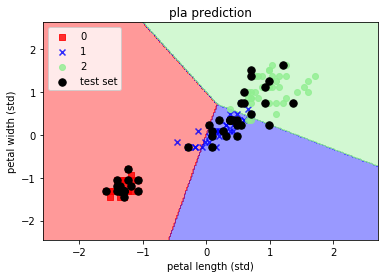

the ACC of lr is 0.98


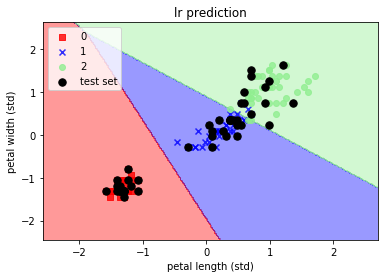

the ACC of linear svm is 0.98


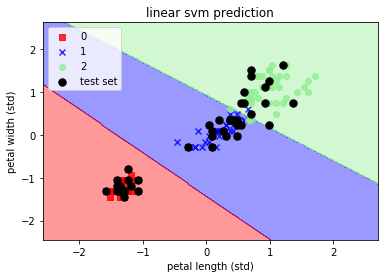

the ACC of low gamma Rbf svm is 0.98


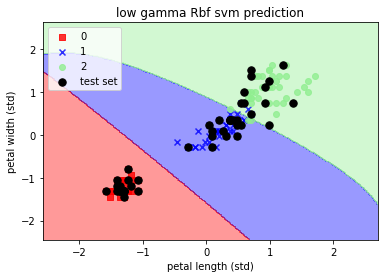

the ACC of high gamma Rbf svm is 0.80


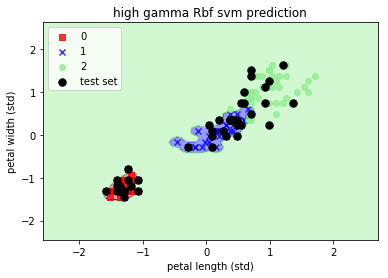

the ACC of decision tree is 0.98


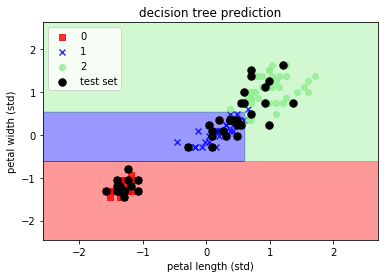

the ACC of RandomForrest is 0.93


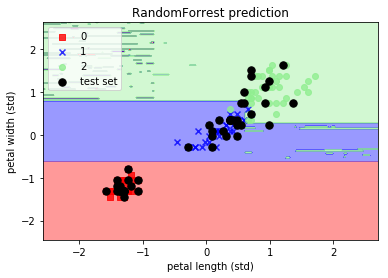

the ACC of knn is 1.00


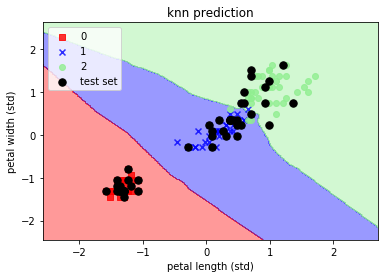

In [102]:
for name in modelNames:
    model = models[name]
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    correct_num = (y_predict == y_test).sum()
    print("the ACC of %s is %.2f" % (name, correct_num/len(y_test)))
    plot_decision_regions(x=x_std, 
                          y=y_combined,
                          classifier=model, 
                          test_idx = test_idx,
                          title=name + " prediction")
    